<a href="https://colab.research.google.com/github/kashish00/Machine-Learning-Projects-TSF/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction using Decision Tree Algorithm**


● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
  predict the right class accordingly.
  
● Dataset: https://bit.ly/3kXTdox

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#check for missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null values

In [6]:
#dropping the ID column as it is unique
df.drop("Id", axis=1 , inplace=True)

In [7]:
df.shape

(150, 5)

**Visualization**

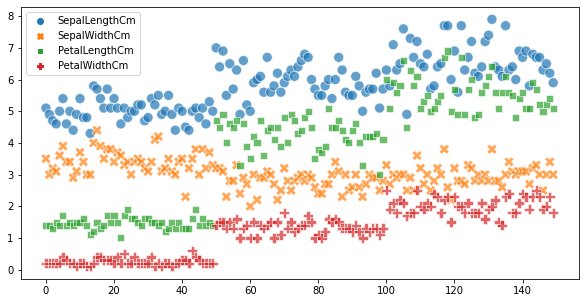

In [8]:
#Plotting distribution of data
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, s=100, alpha=0.7)
plt.show()

In [9]:
#Extracting independent & dependent variables from dataset
y=df.iloc[:,-1] #target
x=df.iloc[:,:-1]

In [10]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0) #70:30 split

**Decision Tree Algorithm**

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
#fitting the model
classifier=DecisionTreeClassifier(criterion='gini') #gini impurity lies between 0 and 0.5 #better than entropy #faster computation
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
#testing the accuracy
classifier.score(x_test,y_test)

0.9777777777777777

In [14]:
#prediction
pred=classifier.predict(x_test)

In [15]:
pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [16]:
#Evaluating Performance metrics
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,pred)
matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

**Text representation of the Decision Tree**

In [17]:
from sklearn import tree
text_rep = tree.export_text(classifier)
print(text_rep)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: Iris-virginica



**Plotting using Tree plot**

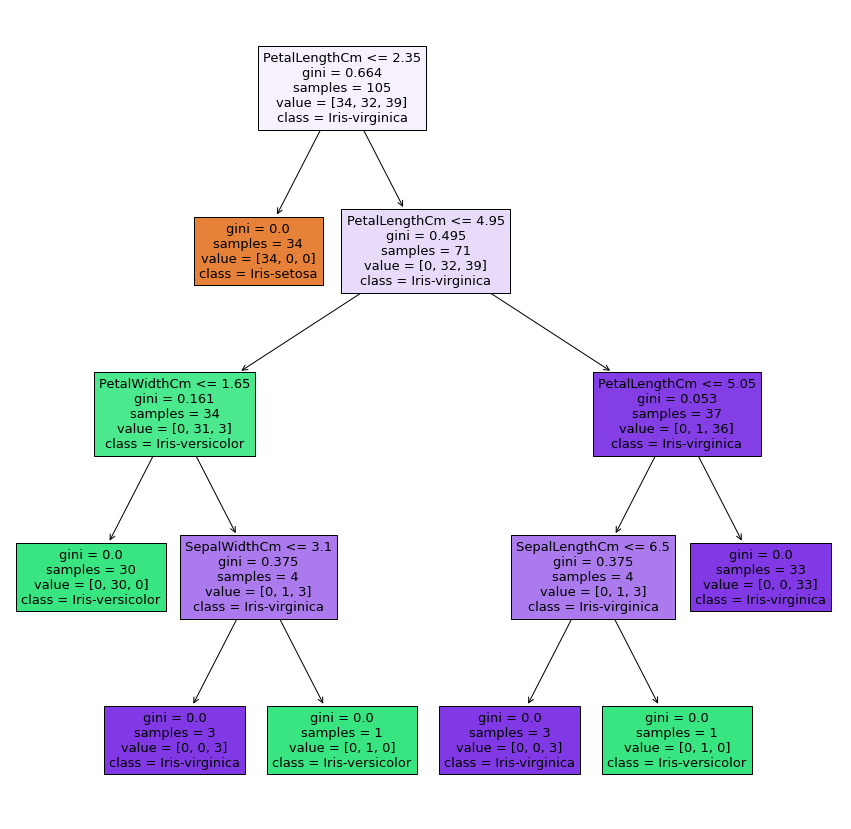

In [18]:
features=df.columns.tolist()[:-1] #column names
target=df['Species'].unique() #target column
fig = plt.figure(figsize=(15,15))
dt=tree.plot_tree(classifier, feature_names=features, class_names=target, filled=True)

Thus we can say that if any new test data is passed to this classifier which is having 97% accuracy , the class can be correctly predicted.